**EXTRACT**

- Lấy dữ liệu từ các file .csv

In [1]:
# import các thư viện cần thiết

import numpy as np
import pandas as pd

In [2]:
# đọc các file .csv
confirm_raw_data = pd.read_csv('./raw_data/time_series_covid19_confirmed_global.csv')
death_raw_data = pd.read_csv('./raw_data/time_series_covid19_deaths_global.csv')
recovered_raw_data = pd.read_csv('./raw_data/time_series_covid19_recovered_global.csv')

# in ra 5 dòng đầu tiên của mỗi file
(confirm_raw_data.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [3]:
(death_raw_data.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
(recovered_raw_data.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**TRANSFORM**

Viết hàm
- Loại các cột Province/State, Lat, Long
- Chỉ lấy các cột trong tháng 3

In [5]:
def clean_data(data):
    result = data.copy()
    # loại bỏ các cột "Province/State", "Lat", "Long"
    result = result.drop(columns = ["Province/State", "Lat", "Long"])
    # lấy các cột trong tháng 3
    result = result.iloc[:, np.r_[0:1, 40:67]]
    # tính tổng giá trị của các cột giá trị nếu có cùng Country/Region
    # gom nhóm theo country/region
    result = result.groupby("Country/Region").sum()
    # sau khi gom nhóm theo coutnry/region, python đã tự động gắn index cho cột này, nên phải tháo index ra
    result = result.reset_index()
    return result

In [6]:
confirmed_cleaned_data = clean_data(confirm_raw_data)
confirmed_cleaned_data

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,1,1,1,1,1,1,1,4,4,...,22,22,24,24,40,40,74,84,94,110
1,Albania,0,0,0,0,0,0,0,0,2,...,59,64,70,76,89,104,123,146,174,186
2,Algeria,1,3,5,12,12,17,17,19,20,...,74,87,90,139,201,230,264,302,367,409
3,Andorra,0,1,1,1,1,1,1,1,1,...,39,53,75,88,113,133,164,188,224,267
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,36,42,42,70,70,77,84,91,107,107
172,Vietnam,16,16,16,16,16,16,18,30,30,...,75,85,91,94,113,123,134,141,153,163
173,West Bank and Gaza,0,0,0,0,4,7,16,16,19,...,41,44,47,48,52,59,59,59,84,91
174,Zambia,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,3,3,12,16,22


In [7]:
death_cleaned_data = clean_data(death_raw_data)
death_cleaned_data

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,Algeria,0,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
172,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
174,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
recovered_cleaned_data = clean_data(recovered_raw_data)
recovered_cleaned_data

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,15,15,15,15,15,31
172,Vietnam,16,16,16,16,16,16,16,16,16,...,16,16,16,17,17,17,17,17,20,20
173,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,17,17,17,17,17,17,17,17
174,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# kiểm tra xem dữ liệu của cột "Country/Region" có giống nhau không
confirmed_cleaned_data["Country/Region"].equals(death_cleaned_data["Country/Region"]) and confirmed_cleaned_data["Country/Region"].equals(recovered_cleaned_data["Country/Region"])

True

Viết hàm
- chuyển các cột ngày tháng thành 1 cột duy nhất là Date
- chuyển dữ liệu từ các cột ngày tháng thành 1 cột dữ liệu là Number
- sắp xếp theo country/region và Date

In [10]:
def convert(cleaned_data):
    result = cleaned_data.copy()
    # chuyển các cột ngày tháng thành 1 cột duy nhất là Date
    result = pd.melt(cleaned_data, id_vars="Country/Region", var_name="Date", value_name="Number")
    # chuyển kiểu dữ liệu cột Date thành datetime
    result["Date"] = pd.to_datetime(result["Date"])
    # sort dữ liệu theo Country/Region và Date
    result = result.sort_values(by = ["Country/Region", "Date"])
    return result

In [11]:
converted_confirmed_data = convert(confirmed_cleaned_data)
converted_confirmed_data

C:\Users\Tien Dat\AppData\Local\Temp\ipykernel_1272\450025851.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result["Date"] = pd.to_datetime(result["Date"])


,Country/Region,Date,Number
0,Afghanistan,2020-03-01,1
176,Afghanistan,2020-03-02,1
352,Afghanistan,2020-03-03,1
528,Afghanistan,2020-03-04,1
704,Afghanistan,2020-03-05,1
...,...,...,...
4047,Zimbabwe,2020-03-23,3
4223,Zimbabwe,2020-03-24,3
4399,Zimbabwe,2020-03-25,3
4575,Zimbabwe,2020-03-26,3


In [12]:
converted_death_data = convert(death_cleaned_data)
converted_death_data

C:\Users\Tien Dat\AppData\Local\Temp\ipykernel_1272\450025851.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result["Date"] = pd.to_datetime(result["Date"])


,Country/Region,Date,Number
0,Afghanistan,2020-03-01,0
176,Afghanistan,2020-03-02,0
352,Afghanistan,2020-03-03,0
528,Afghanistan,2020-03-04,0
704,Afghanistan,2020-03-05,0
...,...,...,...
4047,Zimbabwe,2020-03-23,1
4223,Zimbabwe,2020-03-24,1
4399,Zimbabwe,2020-03-25,1
4575,Zimbabwe,2020-03-26,1


In [13]:
converted_recovered_data = convert(recovered_cleaned_data)
converted_recovered_data

C:\Users\Tien Dat\AppData\Local\Temp\ipykernel_1272\450025851.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result["Date"] = pd.to_datetime(result["Date"])


,Country/Region,Date,Number
0,Afghanistan,2020-03-01,0
176,Afghanistan,2020-03-02,0
352,Afghanistan,2020-03-03,0
528,Afghanistan,2020-03-04,0
704,Afghanistan,2020-03-05,0
...,...,...,...
4047,Zimbabwe,2020-03-23,0
4223,Zimbabwe,2020-03-24,0
4399,Zimbabwe,2020-03-25,0
4575,Zimbabwe,2020-03-26,0


Viết hàm

- Tạo một cột mới Daily_Increase để đo số lượng tăng so với ngày hôm trước (số ca nhiễm / số ca tử vong hoặc số ca hồi phục)

In [14]:
def dailyIncrease(converted_data):
    #gắn index cho country và date đê xài diff()
    converted_data = converted_data.set_index(['Country/Region','Date'])
    
    #tạo cột mới để lưu số lương tăng hằng ngày
    converted_data['Daily_Increase']=converted_data.diff()
    
    #gỡ index
    converted_data=converted_data.reset_index()
    
    #mỗi khi sang 1 nước mới thì cột Daily_Increase là 0
    for i in range(0,int(converted_data['Country/Region'].size) - 1):
        if (converted_data['Country/Region'][i] != converted_data['Country/Region'][i+1]):
            converted_data.at[i+1,'Daily_Increase'] = 0
    
    #chỗ nào NaN thì bằng 0
    converted_data = converted_data.fillna(0)
    
    return converted_data

In [15]:
complete_confirmed_data = dailyIncrease(converted_confirmed_data)
complete_confirmed_data

,Country/Region,Date,Number,Daily_Increase
0,Afghanistan,2020-03-01,1,0.0
1,Afghanistan,2020-03-02,1,0.0
2,Afghanistan,2020-03-03,1,0.0
3,Afghanistan,2020-03-04,1,0.0
4,Afghanistan,2020-03-05,1,0.0
...,...,...,...,...
4747,Zimbabwe,2020-03-23,3,0.0
4748,Zimbabwe,2020-03-24,3,0.0
4749,Zimbabwe,2020-03-25,3,0.0
4750,Zimbabwe,2020-03-26,3,0.0


In [16]:
complete_death_data = dailyIncrease(converted_death_data)
complete_death_data

,Country/Region,Date,Number,Daily_Increase
0,Afghanistan,2020-03-01,0,0.0
1,Afghanistan,2020-03-02,0,0.0
2,Afghanistan,2020-03-03,0,0.0
3,Afghanistan,2020-03-04,0,0.0
4,Afghanistan,2020-03-05,0,0.0
...,...,...,...,...
4747,Zimbabwe,2020-03-23,1,1.0
4748,Zimbabwe,2020-03-24,1,0.0
4749,Zimbabwe,2020-03-25,1,0.0
4750,Zimbabwe,2020-03-26,1,0.0


In [17]:
complete_recovered_data = dailyIncrease(converted_recovered_data)
complete_recovered_data

,Country/Region,Date,Number,Daily_Increase
0,Afghanistan,2020-03-01,0,0.0
1,Afghanistan,2020-03-02,0,0.0
2,Afghanistan,2020-03-03,0,0.0
3,Afghanistan,2020-03-04,0,0.0
4,Afghanistan,2020-03-05,0,0.0
...,...,...,...,...
4747,Zimbabwe,2020-03-23,0,0.0
4748,Zimbabwe,2020-03-24,0,0.0
4749,Zimbabwe,2020-03-25,0,0.0
4750,Zimbabwe,2020-03-26,0,0.0


In [18]:
# đổi tên các cột

complete_confirmed_data.columns = ['Country', 'Date', 'Number_of_confirmed_cases', 'Daily_Increase']
complete_death_data.columns = ['Country', 'Date', 'Number_of_death_cases', 'Daily_Increase']
complete_recovered_data.columns = ['Country', 'Date', 'Number_of_recovered_cases', 'Daily_Increase']

In [19]:
# chuyển cột Daily Increase thành kiểu int

complete_confirmed_data['Daily_Increase'] = complete_confirmed_data['Daily_Increase'].astype(int)
complete_death_data['Daily_Increase'] = complete_death_data['Daily_Increase'].astype(int)
complete_recovered_data['Daily_Increase'] = complete_recovered_data['Daily_Increase'].astype(int)

In [20]:
# tạo file .csv

complete_confirmed_data.to_csv(r'C:\Users\Tien Dat\Desktop\Học tập\ETL\extracted_data\extracted_datacomplete_confirmed_data.csv', index=False)
complete_death_data.to_csv(r'C:\Users\Tien Dat\Desktop\Học tập\ETL\extracted_data\extracted_datacomplete_death_data.csv', index=False)
complete_recovered_data.to_csv(r'C:\Users\Tien Dat\Desktop\Học tập\ETL\extracted_data\extracted_datacomplete_recovered_data.csv', index=False)

**LOAD**

kết nối với SQL server

In [21]:
from sqlalchemy import create_engine
import pyodbc

server = 'TRANDAT'
database = 'covid19_db'
username = 'ETL'
password = '123456'

# Chuỗi kết nối SQL Server với driver ODBC
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Tạo engine kết nối
engine = create_engine(connection_string)

# Kiểm tra kết nối
try:
    conn = engine.connect()
    print("Kết nối SQL Server thành công!")
    conn.close()
except Exception as e:
    print("Lỗi kết nối:", e)

Kết nối SQL Server thành công!


Lấy dữ liệu từ file .csv và thêm vào database

In [22]:
confirm_cases_data = pd.read_csv(r'C:\Users\Tien Dat\Desktop\Học tập\ETL\extracted_data\extracted_datacomplete_confirmed_data.csv')
death_cases_data = pd.read_csv(r'C:\Users\Tien Dat\Desktop\Học tập\ETL\extracted_data\extracted_datacomplete_death_data.csv')
recovered_cases_data = pd.read_csv(r'C:\Users\Tien Dat\Desktop\Học tập\ETL\extracted_data\extracted_datacomplete_recovered_data.csv')

confirm_cases_data.head()

,Country,Date,Number_of_confirmed_cases,Daily_Increase
0,Afghanistan,2020-03-01,1,0
1,Afghanistan,2020-03-02,1,0
2,Afghanistan,2020-03-03,1,0
3,Afghanistan,2020-03-04,1,0
4,Afghanistan,2020-03-05,1,0


In [23]:
# truyền dữ liệu vào database tron sql server

confirm_cases_data.to_sql(name='confirmed', con=engine, if_exists='append', index=False)
death_cases_data.to_sql(name='death', con=engine, if_exists='append', index=False)
recovered_cases_data.to_sql(name='recovered', con=engine, if_exists='append', index=False)

36

**Phân tích và truy vấn**

In [ ]:
# 5 quốc gia có nhiều ca nhiễm nhất

most_confirm = pd.read_sql(""" 
SELECT top 5 country, max(Number_of_confirmed_cases) AS total_confirmed
                                FROM confirmed
                                GROUP BY country
                                ORDER BY max(Number_of_confirmed_cases) DESC;
                           """, con=engine)

most_confirm


,country,total_confirmed
0,US,101657
1,Italy,86498
2,China,81897
3,Spain,65719
4,Germany,50871


C:\Users\Tien Dat\AppData\Local\Temp\ipykernel_1272\1882010712.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(most_confirm_df['country'], rotation="horizontal");


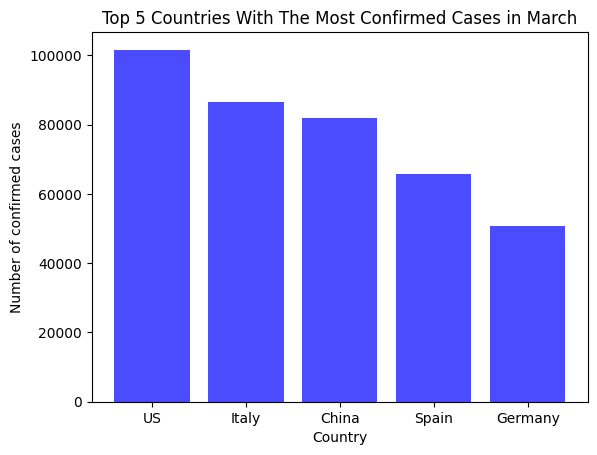

In [52]:
# chuyển dữ liệu thành data frame

most_confirm_df = pd.DataFrame(most_confirm)

# thể hiện thông qua biểu đồ
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(most_confirm_df['country'], most_confirm_df['total_confirmed'], color='blue', alpha=0.7, align="center");
ax.set_xlabel("Country");
ax.set_ylabel("Number of confirmed cases");
ax.set_title("Top 5 Countries With The Most Confirmed Cases in March");
ax.set_xticklabels(most_confirm_df['country'], rotation="horizontal");


In [54]:
# lưu thành hình ảnh
import os
path = r'C:\Users\Tien Dat\Desktop\Học tập\ETL\Img\most_confirm.png'
path
fig.savefig(path, bbox_inches='tight')